### Importation des librairies

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#Traitement des messages d'erreur :
warnings.filterwarnings('ignore')
# Importation du package pour utiliser le SMOTE
from imblearn.over_sampling import SMOTE
#Librairie pour utiliser DummyClassifier
from sklearn.dummy import DummyClassifier
#Librairie afin de récupérer le score AUC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
#Librairie pour la sauvegarde de variable
import pickle

### Fonctions utilisées dans le notebook

In [24]:
#Fonction utilisée pour calculer la taille du dataset avant et après avoir réalisé le SMOTE
def resampling (features, target, resample):
    """Fonction utilisée pour calculer la taille du dataset avant et après avoir réalisé le SMOTE"""
    print('Original dataset shape %s' % Counter(target))
    X, y = resample.fit_resample(features, target)
    print('Resampled dataset shape %s' % Counter(y))
    return X, y

### Lecture des datasets

In [25]:
path = 'Projet_7/'
X_train_transformed = pd.read_csv(path + "X_train_transformed.csv")
X_test_transformed = pd.read_csv(path + "X_test_transformed.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test = pd.read_csv(path + "y_test.csv")

In [26]:
display(X_train_transformed.head())
print(X_train_transformed.shape)
display(X_test_transformed.head())
print(X_test_transformed.shape)
display(y_train.head())
print(y_train.shape)
display(y_test.head())
print(y_test.shape)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,-0.180675,1.218730,0.908077,0.450028,-0.622276,0.0,0.0,0.0,0.0,...,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0,2.0
1,1.0,0.869325,-0.150134,0.668864,-0.019824,-1.121469,0.0,0.0,0.0,0.0,...,0.0,6.0,1.0,1.0,1.0,2.0,1.0,0.0,7.0,2.0
2,0.0,0.119325,-0.318446,-0.034357,-0.536757,-0.216707,0.0,0.0,1.0,1.0,...,0.0,6.0,1.0,1.0,0.0,2.0,1.0,0.0,7.0,2.0
3,0.0,2.369325,1.469357,0.074824,0.508948,-0.925747,-8.0,0.0,1.0,1.0,...,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0,2.0
4,0.0,-0.430675,-0.117945,-0.385539,-0.120870,-1.218725,0.0,-1.0,-1.0,-1.0,...,0.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0,2.0


(246008, 45)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,-0.880675,-0.440459,-0.843008,0.762803,-0.192897,0.0,0.0,1.0,1.0,...,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0
1,2.0,0.569325,0.717577,0.668864,0.292126,-1.245359,9.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0
2,1.0,-0.380675,-0.577427,0.525969,0.795843,0.077885,-2.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,2.0
3,0.0,0.369325,1.480618,0.013453,0.911344,-0.410412,0.0,-1.0,0.0,0.0,...,0.0,6.0,1.0,1.0,2.0,1.0,1.0,0.0,7.0,0.0
4,0.0,0.869325,1.048304,-0.556145,0.780699,0.350282,0.0,-1.0,0.0,0.0,...,1.0,6.0,1.0,0.0,1.0,2.0,1.0,0.0,7.0,2.0


(61503, 45)


,TARGET
0,0
1,0
2,0
3,0
4,0


(246008, 1)


,TARGET
0,0
1,0
2,0
3,0
4,0


(61503, 1)


### DummyClassifier

On va commencer par créer un modèle de base afin de définir si un suréchantillonage est nécessaire

In [27]:
#Le paramètre prior permet de renvoyer l'étiquette de classe la plus fréquente
Dummy_model = DummyClassifier(strategy='prior')
#Entrainement du modèle
Dummy_model.fit(X=X_train_transformed,y=y_train)

DummyClassifier()

In [28]:
model_roc_auc_score = roc_auc_score(y_test, Dummy_model.predict_proba(X_test_transformed)[:,1])
print("Le score AUC est de : ", model_roc_auc_score)
print(classification_report(y_test, Dummy_model.predict(X_test_transformed)))

Le score AUC est de :  0.5
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56445
           1       0.00      0.00      0.00      5058

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.84      0.92      0.88     61503



Affichage de la matrice de confusion

<AxesSubplot:>

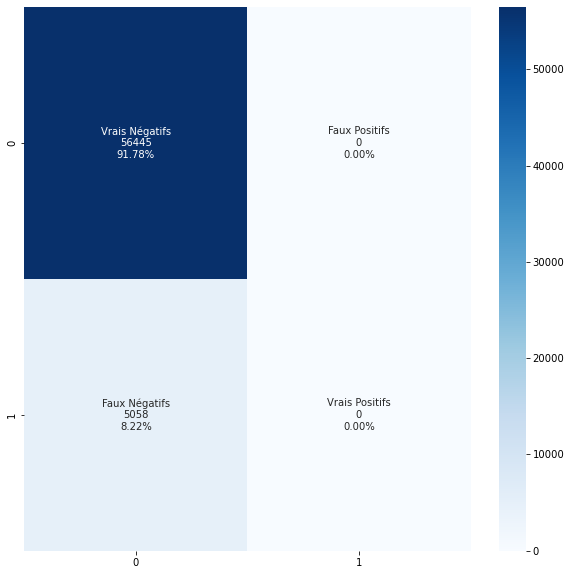

In [29]:
conf_mat = confusion_matrix(y_test, Dummy_model.predict(X_test_transformed))
fig = plt.figure(figsize=(10,10))
group_names = ['Vrais Négatifs', 'Faux Positifs', 'Faux Négatifs', 'Vrais Positifs']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')

Affichage de la courbe de l'AUC

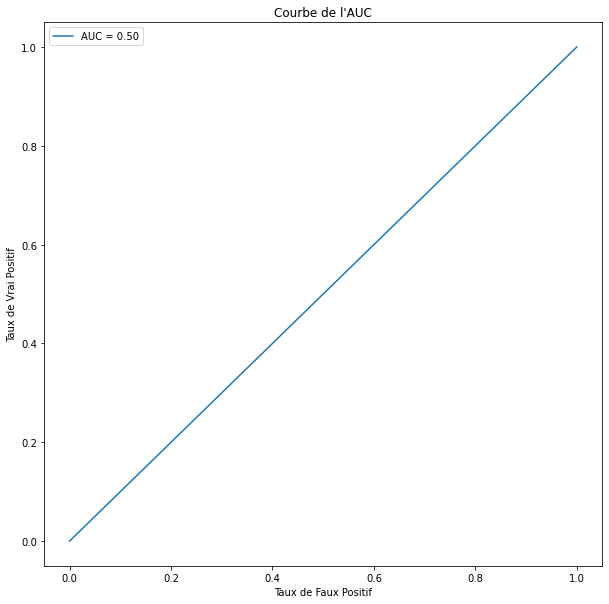

In [30]:
fig = plt.figure(figsize=(10,10))
false_positive, true_positive, _ = roc_curve(y_test, Dummy_model.predict_proba(X_test_transformed)[:,1])
plt.plot(false_positive, true_positive, label = "AUC = %0.2f" %model_roc_auc_score)
plt.xlabel("Taux de Faux Positif")
plt.ylabel("Taux de Vrai Positif")
plt.title("Courbe de l'AUC")
plt.legend(loc = 'upper left')
plt.show()

On peut voir que l'AUC de 0.5 nous indique que le modèl en l'état n'est pas performant. De plus l'accuracy à 0.92 vu précédemment nous montre que nous sommes en présence d'overfitting.
Nous allons donc réaliser un suréchantillonnage (oversampling) afin de corriger cette anomalie. 

### Utilisation de la fonction SMOTE

On commence par regarder avant l'échantillonage le nombre d'observation avec la variable Target à 1 (classe à 1) et le nombre avec la valeur Target à 0 (classe à 0).

In [31]:
sum_target_1 = (np.sum(y_train==1)).values
sum_target_0 = (np.sum(y_train==0)).values

print("Nous avons ", sum_target_1, " observations pour la classe à 1.")
print("Nous avons ", sum_target_0, " observations pour la classe à 0.")

Nous avons  [19767]  observations pour la classe à 1.
Nous avons  [226241]  observations pour la classe à 0.


On exécute ensuite le SMOTE

In [32]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_transformed, y_train)

On affiche ensuite la nouvelle répartition des classes

In [33]:
sum_target_res_1 = (np.sum(y_train_res==1)).values
sum_target_res_0 = (np.sum(y_train_res==0)).values

print("Nous avons ", sum_target_res_1, " observations pour la classe à 1.")
print("Nous avons ", sum_target_res_0, " observations pour la classe à 0.")

Nous avons  [226241]  observations pour la classe à 1.
Nous avons  [226241]  observations pour la classe à 0.


On a donc bien équilibrer les classes de notre modèle.
On va recalculer les différents métriques afin de voir l'impact que cela a.

In [34]:
#Le paramètre prior permet de renvoyer l'étiquette de classe la plus fréquente
Dummy_model = DummyClassifier(strategy='uniform')
#Entrainement du modèle
Dummy_model.fit(X=X_train_res,y=y_train_res)

DummyClassifier(strategy='uniform')

In [35]:
model_roc_auc_score = roc_auc_score(y_test, Dummy_model.predict_proba(X_test_transformed)[:,1])
print("Le score AUC est de : ", model_roc_auc_score)
dummy_class_report = classification_report(y_test, Dummy_model.predict(X_test_transformed))
print(classification_report(y_test, Dummy_model.predict(X_test_transformed)))

Le score AUC est de :  0.5
              precision    recall  f1-score   support

           0       0.92      0.50      0.65     56445
           1       0.08      0.50      0.14      5058

    accuracy                           0.50     61503
   macro avg       0.50      0.50      0.39     61503
weighted avg       0.85      0.50      0.60     61503



<AxesSubplot:>

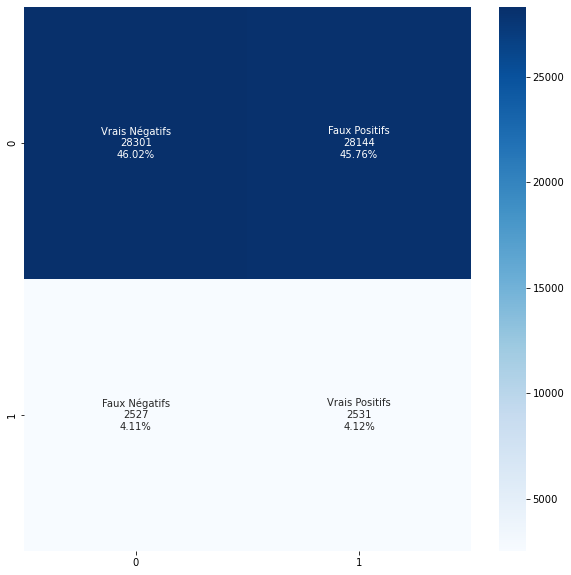

In [36]:
conf_mat = confusion_matrix(y_test, Dummy_model.predict(X_test_transformed))
fig = plt.figure(figsize=(10,10))
group_names = ['Vrais Négatifs', 'Faux Positifs', 'Faux Négatifs', 'Vrais Positifs']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')

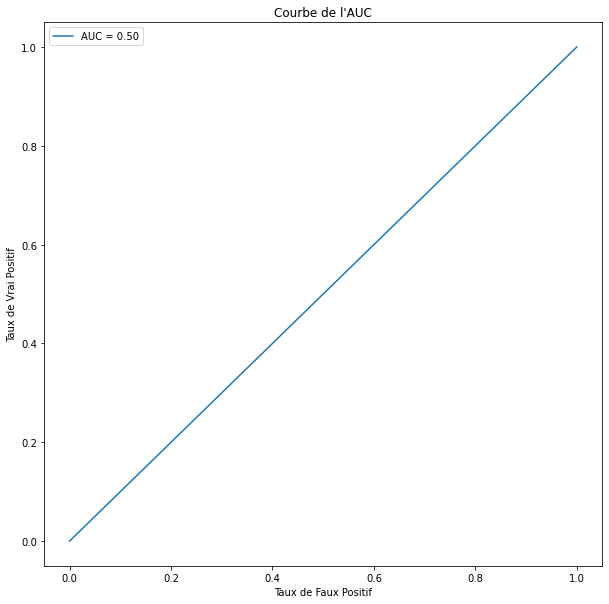

In [37]:
fig = plt.figure(figsize=(10,10))
false_positive, true_positive, _ = roc_curve(y_test, Dummy_model.predict_proba(X_test_transformed)[:,1])
plt.plot(false_positive, true_positive, label = "AUC = %0.2f" %model_roc_auc_score)
plt.xlabel("Taux de Faux Positif")
plt.ylabel("Taux de Vrai Positif")
plt.title("Courbe de l'AUC")
plt.legend(loc = 'upper left')
plt.show()

In [38]:
#Création de dataframe avec X_train_res et y_train_res que l'on sauvegarde au format .CSV
pd.DataFrame(X_train_res).to_csv(path + 'X_train_res.csv',index=False)
pd.DataFrame(y_train_res).to_csv(path + 'y_train_res.csv',index=False)
#Export des résultats du modèle DummyClassifier
fichierSauvegarde = open("donnees","wb")
pickle.dump(model_roc_auc_score, fichierSauvegarde)
pickle.dump(dummy_class_report, fichierSauvegarde)
fichierSauvegarde.close()

### Conclusion

Maintenant que nous avons équilibrer les classes nous allons pouvoir entrainer différent modèles afin de déterminer lequel il est plus adéquat à utliser.